# SVM 

### data loading and EDA

In [1]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")
os.getcwd()

In [2]:
df = pd.read_csv('../data/dataset/full_updated_data.csv')
df

,jobs,interface,Num_intf_residues,Polar,Hydrophobhic,Charged,contact_pairs,sc,hb,sb,...,iptm,mpDockQ/pDockQ,file_source,label,pred,model_1_multimer_v3_pred_0,model_2_multimer_v3_pred_0,model_3_multimer_v3_pred_0,model_4_multimer_v3_pred_0,model_5_multimer_v3_pred_0
0,2GNJ_1_and_2GNJ_2,C_B,22.0,0.318,0.318,0.273,22.0,0.726,9.0,14.0,...,0.959609,0.512518,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.957888,0.954887,0.953721,0.952660,0.951900
1,1JBP_1_and_1JBP_2,C_B,22.0,0.318,0.318,0.273,22.0,0.718,12.0,16.0,...,0.959037,0.513515,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.956872,0.954217,0.954161,0.952466,0.951730
2,3OVV_1_and_3OVV_2,C_B,22.0,0.318,0.318,0.273,22.0,0.725,7.0,14.0,...,0.958931,0.519170,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.956851,0.952951,0.952088,0.952080,0.951719
3,2VO3_1_and_2VO3_2,C_B,22.0,0.318,0.318,0.273,22.0,0.725,7.0,14.0,...,0.958905,0.495511,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.956646,0.952902,0.951221,0.950663,0.949503
4,2VNW_1_and_2VNW_2,C_B,22.0,0.318,0.318,0.273,22.0,0.729,7.0,15.0,...,0.958796,0.516269,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.956535,0.954254,0.953772,0.951799,0.594339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,7DDO_1_and_7DDO_2,C_B,119.0,0.328,0.311,0.185,283.0,0.012,35.0,1.0,...,0.157226,0.707733,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.263660,0.263573,0.261066,0.257602,0.257515
8253,6LZG_2_and_6LZG_1,C_B,67.0,0.388,0.284,0.194,106.0,0.052,12.0,0.0,...,0.150241,0.581248,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.260272,0.258493,0.257715,0.257621,0.248961
8254,7A6O_2_and_7A6O_1,C_B,16.0,0.375,0.188,0.313,16.0,0.160,4.0,7.0,...,0.148244,0.084546,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.243742,0.231274,0.230923,0.222313,0.219328
8255,7EOW_1_and_7EOW_2,C_B,33.0,0.303,0.182,0.424,50.0,0.179,12.0,5.0,...,0.141367,0.215266,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.230280,0.228237,0.228042,0.226219,0.217530


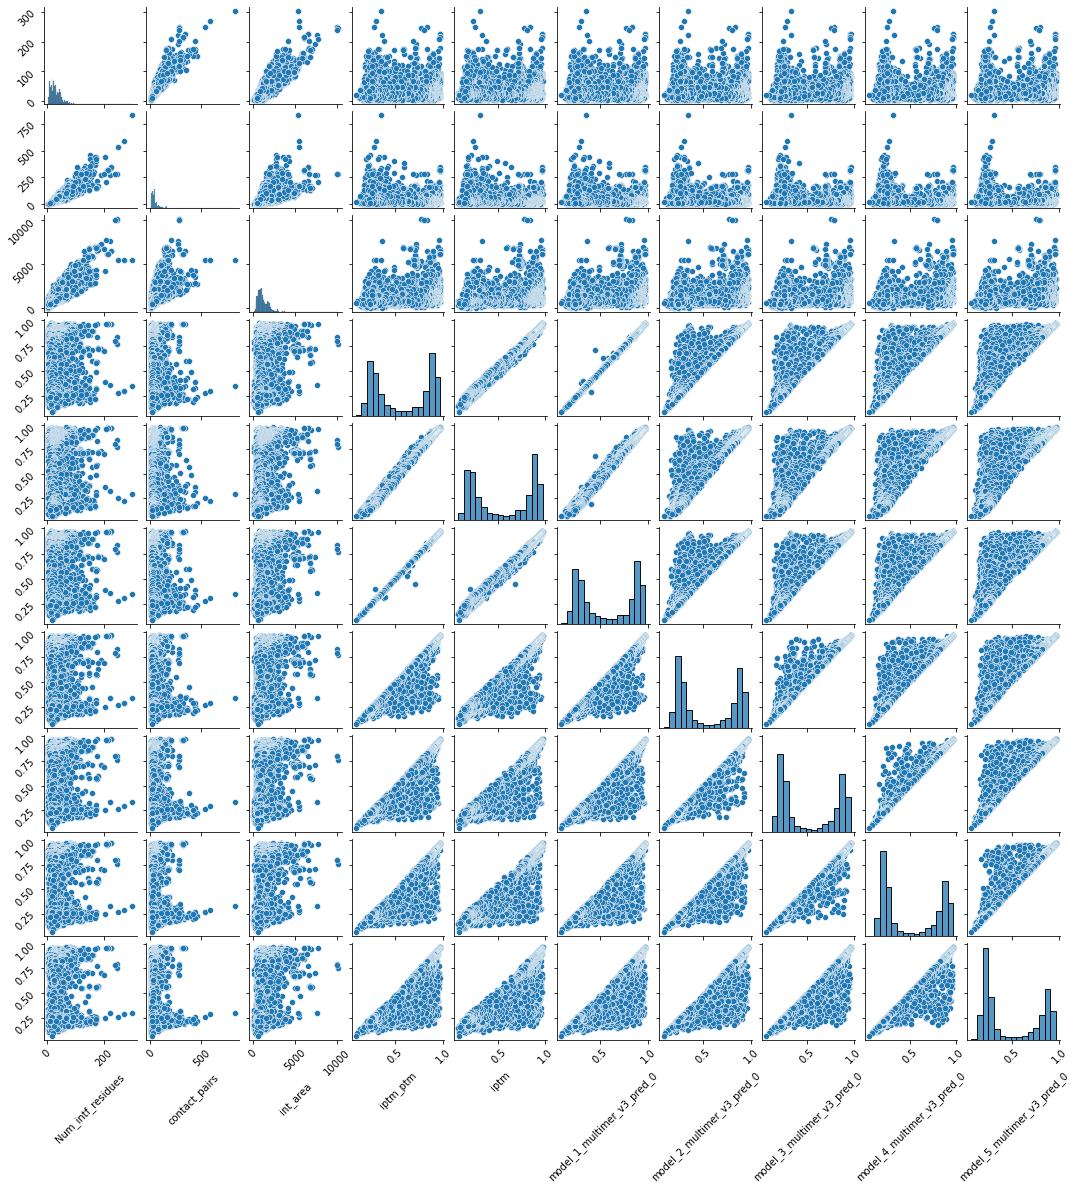

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['Num_intf_residues', 'contact_pairs', 'int_area',
                    'iptm_ptm', 'iptm', 'model_1_multimer_v3_pred_0',
                    'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
                    'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']

# Create the pairplot
plot = sns.pairplot(df[selected_columns])

# Rotate x and y axis labels
for ax in plot.axes.flatten():
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=45)
for ax in plot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=45)
    ax.set_ylabel(ax.get_ylabel(), rotation=45)
for ax in plot.axes.flatten():
    ax.set_ylabel('')
# Adjust the figure size
plot.fig.set_size_inches(15, 15)

# Save the plot
plot.savefig('100_pairplot.png', dpi=300)

# Show the plot
plt.show()


In [ ]:
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'pi_score', 'iptm_ptm', 'iptm', 'mpDockQ/pDockQ', 'model_1_multimer_v3_pred_0',
       'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
       'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']
plot = sns.pairplot(df[selected_columns])
plot.fig.set_size_inches(25, 25)  # Adjust the figure size as needed
plot.savefig('100_pairplot.png', dpi=300)

### SVM models

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [54]:
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area']
X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)

SVC()

In [55]:
y_pred = svm_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn) 
print(fpr)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

0.9128329297820823
[[745  26]
 [118 763]]
0.03372243839169909
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       771
           1       0.97      0.87      0.91       881

    accuracy                           0.91      1652
   macro avg       0.92      0.92      0.91      1652
weighted avg       0.92      0.91      0.91      1652



In [56]:
len(svm_classifier.support_vectors_)

1382

In [48]:
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'iptm_ptm', 'mpDockQ/pDockQ']
X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn) 
print(fpr)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
print(len(svm_classifier.support_vectors_))

0.9243341404358354
[[758  13]
 [112 769]]
0.016861219195849545
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       771
           1       0.98      0.87      0.92       881

    accuracy                           0.92      1652
   macro avg       0.93      0.93      0.92      1652
weighted avg       0.93      0.92      0.92      1652

1133


In [47]:
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'iptm_ptm', 'mpDockQ/pDockQ']
X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn) 
print(fpr)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
print(len(svm_classifier.support_vectors_))

0.9249394673123487
[[753  18]
 [106 775]]
0.023346303501945526
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       771
           1       0.98      0.88      0.93       881

    accuracy                           0.92      1652
   macro avg       0.93      0.93      0.92      1652
weighted avg       0.93      0.92      0.92      1652

1042


In [44]:
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'iptm', 'mpDockQ/pDockQ']
X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn) 
print(fpr)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
print(len(svm_classifier.support_vectors_))

0.9219128329297821
[[752  19]
 [110 771]]
0.02464332036316472
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       771
           1       0.98      0.88      0.92       881

    accuracy                           0.92      1652
   macro avg       0.92      0.93      0.92      1652
weighted avg       0.93      0.92      0.92      1652

1074


In [59]:
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'iptm_ptm', 'iptm', 'mpDockQ/pDockQ']
X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn) 
print(fpr)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
print(len(svm_classifier.support_vectors_))

0.9322033898305084
[[756  15]
 [ 97 784]]
0.019455252918287938
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       771
           1       0.98      0.89      0.93       881

    accuracy                           0.93      1652
   macro avg       0.93      0.94      0.93      1652
weighted avg       0.94      0.93      0.93      1652

1000


In [50]:
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'iptm_ptm', 'mpDockQ/pDockQ', 'pi_score']
X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn) 
print(fpr)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print(len(svm_classifier.support_vectors_))

0.9231234866828087
[[758  13]
 [114 767]]
0.016861219195849545
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       771
           1       0.98      0.87      0.92       881

    accuracy                           0.92      1652
   macro avg       0.93      0.93      0.92      1652
weighted avg       0.93      0.92      0.92      1652

1107


In [51]:
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'iptm_ptm', 'mpDockQ/pDockQ', 'pi_score']
X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn) 
print(fpr)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print(len(svm_classifier.support_vectors_))

0.923728813559322
[[754  17]
 [109 772]]
0.02204928664072633
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       771
           1       0.98      0.88      0.92       881

    accuracy                           0.92      1652
   macro avg       0.93      0.93      0.92      1652
weighted avg       0.93      0.92      0.92      1652

1035


In [53]:
1107/0.8/8257

0.16758507932663194

In [62]:
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'mpDockQ/pDockQ', 'pi_score', 'model_1_multimer_v3_pred_0',
       'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
       'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']
X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn) 
print(fpr)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print(len(svm_classifier.support_vectors_))

0.9267554479418886
[[760  11]
 [110 771]]
0.014267185473411154
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       771
           1       0.99      0.88      0.93       881

    accuracy                           0.93      1652
   macro avg       0.93      0.93      0.93      1652
weighted avg       0.93      0.93      0.93      1652

1006


In [63]:
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'mpDockQ/pDockQ', 'pi_score', 'model_1_multimer_v3_pred_0',
       'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
       'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']
X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn) 
print(fpr)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print(len(svm_classifier.support_vectors_))

0.9297820823244553
[[759  12]
 [104 777]]
0.01556420233463035
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       771
           1       0.98      0.88      0.93       881

    accuracy                           0.93      1652
   macro avg       0.93      0.93      0.93      1652
weighted avg       0.94      0.93      0.93      1652

941


### Cross validation for 3 models

(training:validation):test = (8:2):2

In [64]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=5)  
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'iptm', 'iptm_ptm', 'mpDockQ/pDockQ', 'pi_score']
X = df[selected_columns]
y = df.label.astype(int)
X_train_ori, X_test, y_train_ori, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

acc = []
fps = []

for train_indices, val_indices in k_fold.split(X_train_ori):
    
    X_train, X_val = X_train_ori.iloc[train_indices], X_train_ori.iloc[val_indices]
    y_train, y_val = y_train_ori.iloc[train_indices], y_train_ori.iloc[val_indices]
    
    svm_classifier = SVC(kernel='linear', C=1.0)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_val)
    acc.append(accuracy_score(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    fpr = fp/(fp+tn) 
    fps.append(fpr)

Mean Accuracy: 0.94, Mean False Positive Rate: 0.04


Text(0, 0.5, 'False Positive Rate')

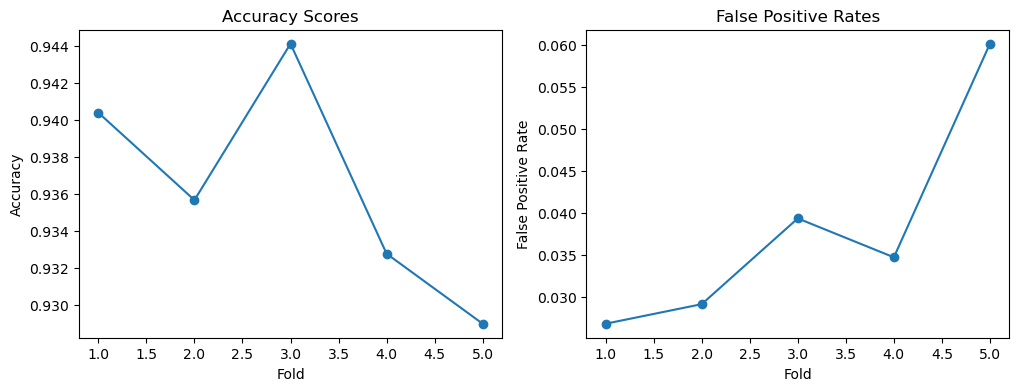

In [ ]:
# Calculate and print the mean scores
mean_accuracy = np.mean(acc)
mean_fp_rate = np.mean(fps)
print(f'Mean Accuracy: {mean_accuracy:.2f}, Mean False Positive Rate: {mean_fp_rate:.2f}')

# Create and display two plots
plt.figure(figsize=(12, 4))
n_splits = 5

# Plot the accuracy scores
plt.subplot(1, 2, 1)
plt.plot(range(1, n_splits + 1), acc, marker='o')
plt.title('Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

# Plot the false positive rates
plt.subplot(1, 2, 2)
plt.plot(range(1, n_splits + 1), fps, marker='o')
plt.title('False Positive Rates')
plt.xlabel('Fold')
plt.ylabel('False Positive Rate')

In [ ]:
## test SVM
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=5)  
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'mpDockQ/pDockQ', 'pi_score', 'model_1_multimer_v3_pred_0',
       'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
       'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']
X = df[selected_columns]
y = df.label.astype(int)
X_train_ori, X_test, y_train_ori, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

acc = []
fps = []

for train_indices, val_indices in k_fold.split(X_train_ori):
    
    X_train, X_val = X_train_ori.iloc[train_indices], X_train_ori.iloc[val_indices]
    y_train, y_val = y_train_ori.iloc[train_indices], y_train_ori.iloc[val_indices]
    
    svm_classifier = SVC(kernel='linear', C=1.0)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_val)
    acc.append(accuracy_score(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    fpr = fp/(fp+tn) 
    fps.append(fpr)

[[629  10]
 [ 71 611]]
[[625  19]
 [ 57 620]]
[[597  15]
 [ 77 632]]
[[602  22]
 [ 65 632]]
[[603  17]
 [ 50 651]]


Mean Accuracy: 0.94, Mean False Positive Rate: 0.03


Text(0, 0.5, 'False Positive Rate')

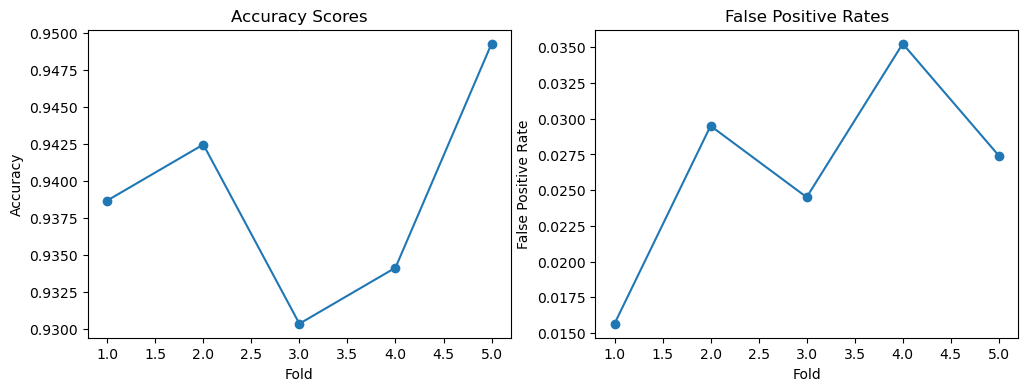

In [ ]:
mean_accuracy = np.mean(acc)
mean_fp_rate = np.mean(fps)
print(f'Mean Accuracy: {mean_accuracy:.2f}, Mean False Positive Rate: {mean_fp_rate:.2f}')

# Create and display two plots
plt.figure(figsize=(12, 4))
n_splits = 5

# Plot the accuracy scores
plt.subplot(1, 2, 1)
plt.plot(range(1, n_splits + 1), acc, marker='o')
plt.title('Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

# Plot the false positive rates
plt.subplot(1, 2, 2)
plt.plot(range(1, n_splits + 1), fps, marker='o')
plt.title('False Positive Rates')
plt.xlabel('Fold')
plt.ylabel('False Positive Rate')

[[629  10]
 [ 71 611]]
[[619  25]
 [ 58 619]]
[[594  18]
 [ 74 635]]
[[603  21]
 [ 65 632]]
[[604  16]
 [ 48 653]]
Mean Accuracy: 0.94, Mean False Positive Rate: 0.03


Text(0, 0.5, 'False Positive Rate')

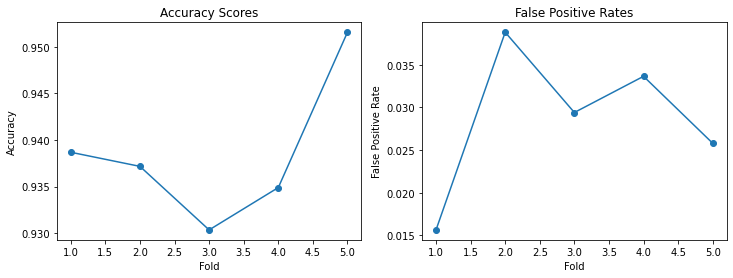

In [58]:
## test SVM
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=5)  
selected_columns = ['Polar', 'Hydrophobhic',
       'Charged', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'mpDockQ/pDockQ', 'pi_score', 'model_1_multimer_v3_pred_0',
       'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
       'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']
X = df[selected_columns]
y = df.label.astype(int)
X_train_ori, X_test, y_train_ori, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

acc = []
fps = []

for train_indices, val_indices in k_fold.split(X_train_ori):
    
    X_train, X_val = X_train_ori.iloc[train_indices], X_train_ori.iloc[val_indices]
    y_train, y_val = y_train_ori.iloc[train_indices], y_train_ori.iloc[val_indices]
    
    svm_classifier = SVC(kernel='linear', C=1.0)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_val)
    acc.append(accuracy_score(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    fpr = fp/(fp+tn) 
    fps.append(fpr)

mean_accuracy = np.mean(acc)
mean_fp_rate = np.mean(fps)
print(f'Mean Accuracy: {mean_accuracy:.2f}, Mean False Positive Rate: {mean_fp_rate:.2f}')

# Create and display two plots
plt.figure(figsize=(12, 4))
n_splits = 5

# Plot the accuracy scores
plt.subplot(1, 2, 1)
plt.plot(range(1, n_splits + 1), acc, marker='o')
plt.title('Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

# Plot the false positive rates
plt.subplot(1, 2, 2)
plt.plot(range(1, n_splits + 1), fps, marker='o')
plt.title('False Positive Rates')
plt.xlabel('Fold')
plt.ylabel('False Positive Rate')

### Feature Selection & Feature Importance

In [ ]:
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'mpDockQ/pDockQ', 'pi_score', 'model_1_multimer_v3_pred_0',
       'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
       'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Initialize empty sets and lists
selected_features = []
selected_feature_indices = []
best_accuracy = 0.0

# Lists to store FPR/FNR and number of support vectors for each model
fpr_values = []
fnr_values = []
num_support_vectors = []
accuracies = []

# Maximum number of features to select
max_features_to_select = X_train.shape[1]

while len(selected_feature_indices) < max_features_to_select:
    best_feature = None
    best_svm_model = None
    best_confusion_matrix = None
    best_fpr = float('inf')  # Initialize with positive infinity
    
    for feature_index in range(X_train.shape[1]):
        if feature_index not in selected_feature_indices:
            current_features = selected_feature_indices + [feature_index]
            X_train_subset = X_train[:, current_features]
            X_test_subset = X_test[:, current_features]

            # Train a classifier (e.g., SVM) on the current subset of features
            svm_model = SVC(kernel='linear')
            svm_model.fit(X_train_subset, y_train)

            # Evaluate the model on the validation set
            y_pred = svm_model.predict(X_test_subset)
            accuracy = accuracy_score(y_test, y_pred)
            confusion_mat = confusion_matrix(y_test, y_pred)
            tn, fp, fn, tp = confusion_mat.ravel()
            current_fpr = fp / (fp + tn)  # False Positive Rate
            current_fnr = fn / (fn + tp)  # False Negative Rate
            
#           I use fpr as the selection measurement
            if current_fpr < best_fpr:
                best_accuracy = accuracy
                best_feature = feature_index
                best_svm_model = svm_model
                best_fpr = current_fpr
                best_fnr = current_fnr
                best_confusion_matrix = confusion_mat

    if best_feature is not None:
        selected_feature_indices.append(best_feature)
        selected_features.append(selected_columns[best_feature])
        
        # Record FPR and number of support vectors
        fpr_values.append(best_fpr)
        fnr_values.append(best_fnr)
        num_sv = len(best_svm_model.support_)
        num_support_vectors.append(num_sv)
        accuracies.append(best_accuracy)
        
        print(f"Added Feature: {selected_columns[best_feature]}")
    else:
        break

results_df = pd.DataFrame({
    'Feature selected': selected_features,
    'Accuracy': accuracies,
    'FPR': fpr_values,
    'FNR': fnr_values,
    'Num_Support_Vectors': num_support_vectors
})

results_df.to_csv('forward_selection_single_results.csv', index=False)

Added Feature: model_4_multimer_v3_pred_0
Added Feature: Num_intf_residues
Added Feature: Hydrophobhic
Added Feature: Charged
Added Feature: int_area
Added Feature: model_5_multimer_v3_pred_0
Added Feature: sb
Added Feature: Polar
Added Feature: int_solv_en
Added Feature: contact_pairs
Added Feature: model_2_multimer_v3_pred_0
Added Feature: model_1_multimer_v3_pred_0
Added Feature: model_3_multimer_v3_pred_0
Added Feature: hb
Added Feature: mpDockQ/pDockQ
Added Feature: sc
Added Feature: pi_score


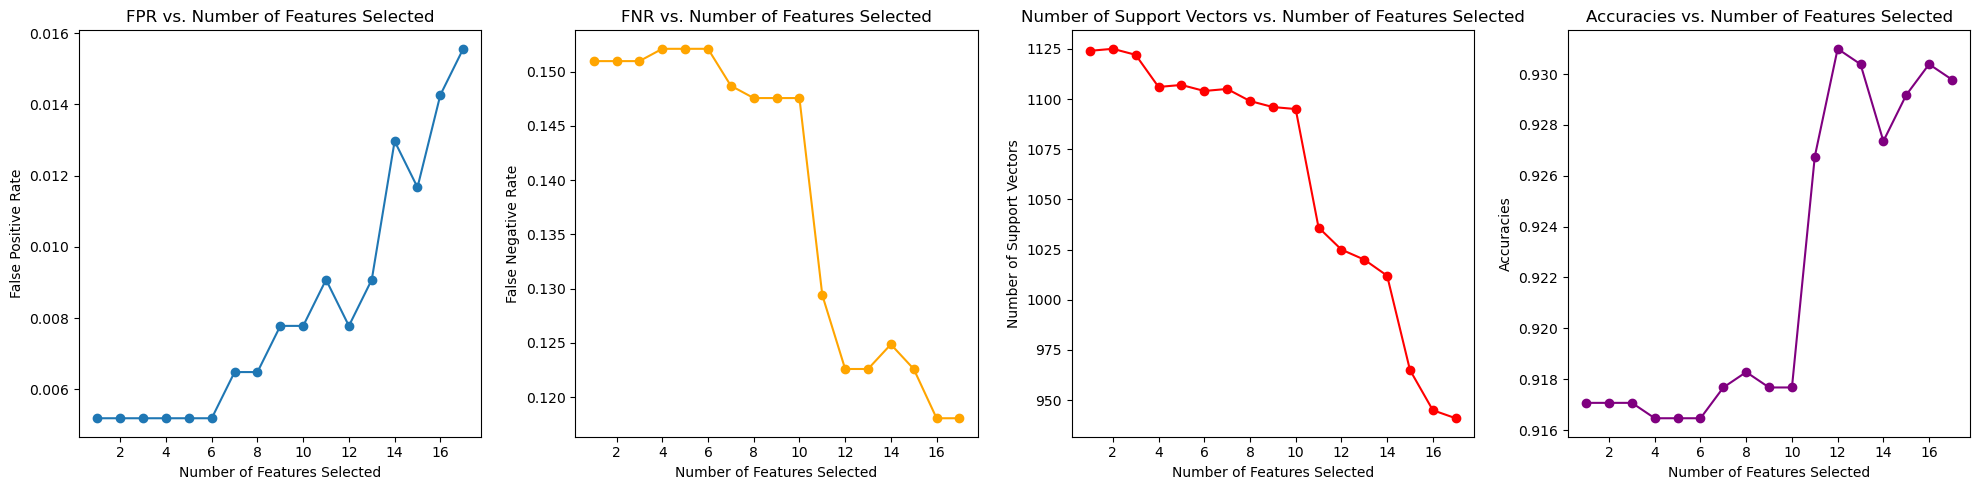

In [ ]:
# Plot the FPR values and number of support vectors
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.plot(range(1, len(fpr_values) + 1), fpr_values, marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("False Positive Rate")
plt.title("FPR vs. Number of Features Selected")

plt.subplot(1, 4, 2)
plt.plot(range(1, len(fnr_values) + 1), fnr_values, marker='o', color='orange')
plt.xlabel("Number of Features Selected")
plt.ylabel("False Negative Rate")
plt.title("FNR vs. Number of Features Selected")

plt.subplot(1, 4, 3)
plt.plot(range(1, len(num_support_vectors) + 1), num_support_vectors, marker='o', color='red')
plt.xlabel("Number of Features Selected")
plt.ylabel("Number of Support Vectors")
plt.title("Number of Support Vectors vs. Number of Features Selected")

plt.subplot(1, 4, 4)
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', color='purple')
plt.xlabel("Number of Features Selected")
plt.ylabel("Accuracies")
plt.title("Accuracies vs. Number of Features Selected")

plt.tight_layout()
plt.show()

In [60]:
X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
num_iterations = 10

results = [[] for _ in range(num_iterations)]
for iteration in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=iteration)

    # Initialize empty sets and lists
    selected_features = []
    selected_feature_indices = []
    best_accuracy = 0.0

    # Lists to store FPR/FNR and number of support vectors for each model
    fpr_values = []
    fnr_values = []
    num_support_vectors = []
    accuracies = []

    # Maximum number of features to select
    max_features_to_select = X_train.shape[1]

    while len(selected_feature_indices) < max_features_to_select:
        best_feature = None
        best_svm_model = None
        best_confusion_matrix = None
        best_fpr = float('inf')  # Initialize with positive infinity

        for feature_index in range(X_train.shape[1]):
            if feature_index not in selected_feature_indices:
                current_features = selected_feature_indices + [feature_index]
                X_train_subset = X_train[:, current_features]
                X_test_subset = X_test[:, current_features]

                # Train a classifier (e.g., SVM) on the current subset of features
                svm_model = SVC(kernel='linear')
                svm_model.fit(X_train_subset, y_train)

                # Evaluate the model on the validation set
                y_pred = svm_model.predict(X_test_subset)
                accuracy = accuracy_score(y_test, y_pred)
                confusion_mat = confusion_matrix(y_test, y_pred)
                tn, fp, fn, tp = confusion_mat.ravel()
                current_fpr = fp / (fp + tn)  # False Positive Rate
                current_fnr = fn / (fn + tp)  # False Negative Rate

    #           I use fpr as the selection measurement
                if current_fpr < best_fpr:
                    best_accuracy = accuracy
                    best_feature = feature_index
                    best_svm_model = svm_model
                    best_fpr = current_fpr
                    best_fnr = current_fnr
                    best_confusion_matrix = confusion_mat

        if best_feature is not None:
            selected_feature_indices.append(best_feature)
            selected_features.append(selected_columns[best_feature])

            # Record FPR and number of support vectors
            fpr_values.append(best_fpr)
            fnr_values.append(best_fnr)
            num_sv = len(best_svm_model.support_)
            num_support_vectors.append(num_sv)
            accuracies.append(best_accuracy)
        else:
            break
    results[iteration].extend([selected_feature_indices, selected_features, fpr_values, fnr_values, num_support_vectors, accuracies])
    print('completed: ', iteration)

dict_list = []
for i in range(num_iterations):
    dict_list.append({
        'Round': [iteration+1] * len(results[iteration][0]),
        'Feature index selected': results[iteration][0],
        'Feature selected': results[iteration][1],
        'FPR': results[iteration][2],
        'FNR': results[iteration][3],
        'Num_Support_Vectors': results[iteration][4],
        'Accuracy': results[iteration][5],
    })


dfs = [pd.DataFrame.from_dict(d, orient='index').reset_index() for d in dict_list]
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.to_csv('forward_selection_10_rounds_results_1.csv', index=False)

completed:  0
completed:  1
completed:  2
completed:  3
completed:  4
completed:  5
completed:  6
completed:  7
completed:  8
completed:  9


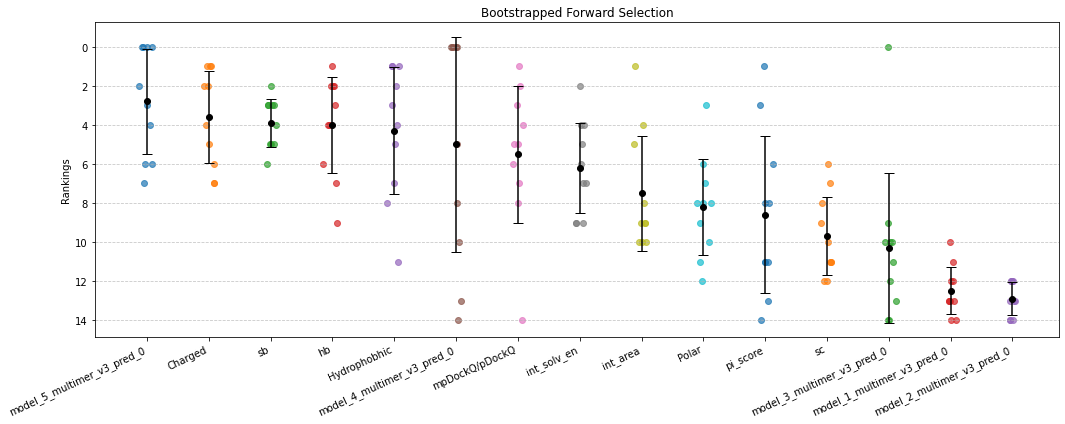

In [66]:
feature_counts = {selected_columns[i]:[] for i in range(len(results[0][0]))}

for round_results in results:
    for feature_index in round_results[0]:
        feature_counts[selected_columns[feature_index]].append(round_results[0].index(feature_index))

# Calculate mean and standard deviation for each key
mean_values = {key: np.mean(values) for key, values in feature_counts.items()}
std_values = {key: np.std(values) for key, values in feature_counts.items()}

# Sort keys based on mean values
sorted_keys = sorted(mean_values, key=mean_values.get)

# Plotting
plt.figure(figsize=(15, 6))

# Scatter original values with jitter
for i, key in enumerate(sorted_keys):
    values = feature_counts[key]
    x_values = np.random.normal(i, 0.05, size=len(values))  # Add jitter to x-coordinates
    plt.scatter(x_values, values, label=key, alpha=0.7)

# Plot mean values with error bars
plt.errorbar(range(len(sorted_keys)), [mean_values[key] for key in sorted_keys], yerr=[std_values[key] for key in sorted_keys], fmt='o', capsize=5, color='black', label='Mean Values')

# plt.xlabel('Features')
plt.ylabel('Rankings')
plt.title('Bootstrapped Forward Selection')
plt.xticks(range(len(sorted_keys)), sorted_keys, rotation=25, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

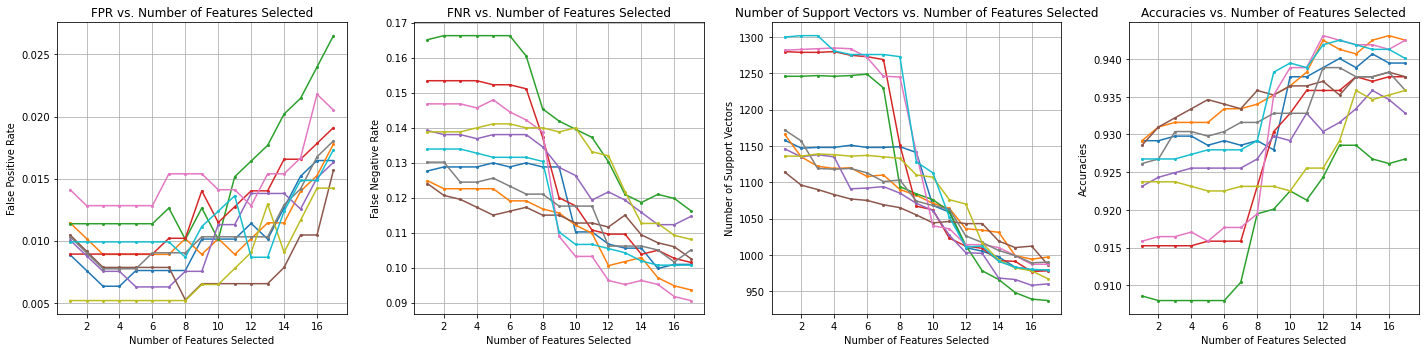

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
# Plot the other lines
for i in range(len(results)):  # Assuming you have 10 lists in total
    # Replace `fpr_values_2` with the name of your other lists
    plt.plot(range(1, len(results[i][2]) + 1), results[i][2], marker='o', markersize=2, label=f'Line {i}')
plt.xlabel("Number of Features Selected")
plt.ylabel("False Positive Rate")
plt.title("FPR vs. Number of Features Selected")
plt.grid(True) 

plt.subplot(1, 4, 2)
for i in range(len(results)):  # Assuming you have 10 lists in total
    # Replace `fpr_values_2` with the name of your other lists
    plt.plot(range(1, len(results[i][3]) + 1), results[i][3], marker='o', markersize=2, label=f'Line {i}')
plt.xlabel("Number of Features Selected")
plt.ylabel("False Negative Rate")
plt.title("FNR vs. Number of Features Selected")
plt.grid(True)  

plt.subplot(1, 4, 3)
for i in range(len(results)):  # Assuming you have 10 lists in total
    # Replace `fpr_values_2` with the name of your other lists
    plt.plot(range(1, len(results[i][4]) + 1), results[i][4], marker='o', markersize=2, label=f'Line {i}')
plt.xlabel("Number of Features Selected")
plt.ylabel("Number of Support Vectors")
plt.title("Number of Support Vectors vs. Number of Features Selected")
plt.grid(True) 

plt.subplot(1, 4, 4)
for i in range(len(results)):  # Assuming you have 10 lists in total
    # Replace `fpr_values_2` with the name of your other lists
    plt.plot(range(1, len(results[i][5]) + 1), results[i][5], marker='o', markersize=2, label=f'Line {i}')
plt.xlabel("Number of Features Selected")
plt.ylabel("Accuracies")
plt.title("Accuracies vs. Number of Features Selected")
plt.grid(True) 

plt.tight_layout()
plt.show()


In [ ]:
# select top 10 features in linear kernal
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=5)  
selected_columns = sorted_keys[:10]
X = df[selected_columns]
y = df.label.astype(int)
X_train_ori, X_test, y_train_ori, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

acc = []
fps = []

for train_indices, val_indices in k_fold.split(X_train_ori):
    
    X_train, X_val = X_train_ori.iloc[train_indices], X_train_ori.iloc[val_indices]
    y_train, y_val = y_train_ori.iloc[train_indices], y_train_ori.iloc[val_indices]
    
    svm_classifier = SVC(kernel='linear', C=1.0)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_val)
    acc.append(accuracy_score(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    fpr = fp/(fp+tn) 
    fps.append(fpr)

[[629  10]
 [ 78 604]]
[[629  15]
 [ 67 610]]
[[595  17]
 [ 84 625]]
[[608  16]
 [ 76 621]]
[[612   8]
 [ 64 637]]


Mean Accuracy: 0.93, Mean False Positive Rate: 0.02


Text(0, 0.5, 'False Positive Rate')

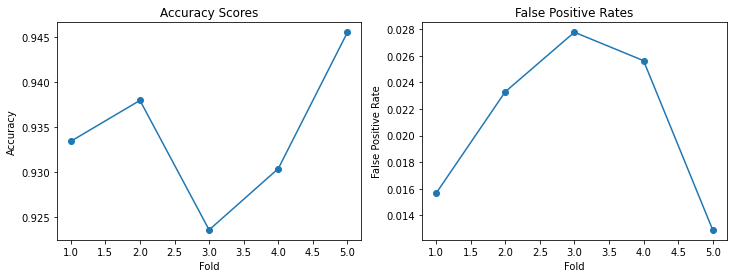

In [ ]:
mean_accuracy = np.mean(acc)
mean_fp_rate = np.mean(fps)
print(f'Mean Accuracy: {mean_accuracy:.2f}, Mean False Positive Rate: {mean_fp_rate:.2f}')

# Create and display two plots
plt.figure(figsize=(12, 4))
n_splits = 5

# Plot the accuracy scores
plt.subplot(1, 2, 1)
plt.plot(range(1, n_splits + 1), acc, marker='o')
plt.title('Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

# Plot the false positive rates
plt.subplot(1, 2, 2)
plt.plot(range(1, n_splits + 1), fps, marker='o')
plt.title('False Positive Rates')
plt.xlabel('Fold')
plt.ylabel('False Positive Rate')

In [ ]:
selected_columns = sorted_keys[:10]
X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn) 
print(fpr)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print(len(svm_classifier.support_vectors_))

0.9261501210653753
[[765   6]
 [116 765]]
0.007782101167315175
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       771
           1       0.99      0.87      0.93       881

    accuracy                           0.93      1652
   macro avg       0.93      0.93      0.93      1652
weighted avg       0.93      0.93      0.93      1652

1017


### L1 feature selection

In [ ]:
from sklearn import datasets
from sklearn import svm
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'mpDockQ/pDockQ', 'pi_score', 'model_1_multimer_v3_pred_0',
       'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
       'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']
X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Create an SVM classifier with L1 regularization
clf = svm.LinearSVC(penalty='l1', loss='squared_hinge', 
                    dual=False, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, 
                    intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)

# Fit the classifier to the data
clf.fit(X_train, y_train)

# Get the feature weights (coefficients) for the trained classifier
feature_weights = clf.coef_

# Display the feature weights
print("Feature Weights:")
for i, class_weights in enumerate(feature_weights):
    print(f"Class {i}:")
    for j, weight in enumerate(class_weights):
        print(f"Feature {j} {selected_columns[j]}: {weight:.4f}")

Feature Weights:
Class 0:
Feature 0 Num_intf_residues: 0.1936
Feature 1 Polar: 0.0861
Feature 2 Hydrophobhic: -0.0290
Feature 3 Charged: -0.0481
Feature 4 contact_pairs: -0.2532
Feature 5 sc: 0.2095
Feature 6 hb: 0.1501
Feature 7 sb: 0.0271
Feature 8 int_solv_en: -0.0606
Feature 9 int_area: -0.2697
Feature 10 mpDockQ/pDockQ: 0.2956
Feature 11 pi_score: 0.0787
Feature 12 model_1_multimer_v3_pred_0: 0.1145
Feature 13 model_2_multimer_v3_pred_0: 0.0872
Feature 14 model_3_multimer_v3_pred_0: 0.3425
Feature 15 model_4_multimer_v3_pred_0: 0.2066
Feature 16 model_5_multimer_v3_pred_0: 0.3014


In [ ]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn) 
print(fpr)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

0.9322033898305084
[[759  12]
 [100 781]]
0.01556420233463035
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       771
           1       0.98      0.89      0.93       881

    accuracy                           0.93      1652
   macro avg       0.93      0.94      0.93      1652
weighted avg       0.94      0.93      0.93      1652



In [ ]:
len(svm_classifier.support_vectors_)

1382

### C tuning

C: power of penalty for soft margin: the larger C is, the margin harder. -> too large C may lead to overfitting. 

In [11]:
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def fpr_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fpr = fp / (fp + tn)
    return -fpr  # We want to minimize FPR, so we negate it

def accuracy_scorer(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def support_vectors_scorer(estimator, X, y):
    return -len(estimator.support_vectors_) 

fpr_scorer = make_scorer(fpr_scorer)
accuracy_scorer = make_scorer(accuracy_scorer)
support_vectors_scorer = make_scorer(support_vectors_scorer)
param_grid = {'C': [0.001, 0.005, 0.01, 0.1, 0.5, 1, 10, 100]}

selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'mpDockQ/pDockQ', 'pi_score', 'model_1_multimer_v3_pred_0',
       'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
       'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']
X = df[selected_columns]
y = df.label.astype(int)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

svm_classifier = SVC(kernel='linear')
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring={'fpr': fpr_scorer, 'accuracy': accuracy_scorer}, refit=False)
grid_search.fit(X_train, y_train)
C_tuning_gridSearch_df = pd.DataFrame(grid_search.cv_results_)
C_tuning_gridSearch_df.to_csv('C_tuning_gridSearch_results.csv', index=False)

In [6]:
C_tuning_gridSearch_df = pd.read_csv('C_tuning_gridSearch_results.csv')
C_tuning_gridSearch_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_fpr,split1_test_fpr,split2_test_fpr,split3_test_fpr,...,std_test_fpr,rank_test_fpr,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.081655,0.002326,0.015906,0.000228,0.001,{'C': 0.001},-0.003190,-0.011146,-0.006369,-0.006369,...,0.002918,1,0.934898,0.935655,0.932627,0.935655,0.947767,0.937320,0.005340,8
1,0.066805,0.001562,0.012825,0.000573,0.005,{'C': 0.005},-0.007974,-0.015924,-0.011146,-0.012739,...,0.002735,2,0.934898,0.938683,0.934898,0.937926,0.950038,0.939288,0.005592,7
2,0.069373,0.002082,0.012462,0.000223,0.010,{'C': 0.01},-0.007974,-0.017516,-0.011146,-0.012739,...,0.003181,3,0.937169,0.939440,0.934898,0.938683,0.951552,0.940348,0.005813,3
3,0.073276,0.004220,0.011761,0.000500,0.100,{'C': 0.1},-0.007974,-0.023885,-0.014331,-0.014331,...,0.005092,4,0.938683,0.940954,0.934141,0.941711,0.951552,0.941408,0.005717,1
4,0.088199,0.002481,0.011261,0.000463,0.500,{'C': 0.5},-0.007974,-0.023885,-0.014331,-0.014331,...,0.005171,5,0.938683,0.940954,0.934141,0.940197,0.950038,0.940802,0.005188,2
5,0.104117,0.005192,0.010821,0.000237,1.000,{'C': 1},-0.007974,-0.025478,-0.015924,-0.014331,...,0.005640,6,0.938683,0.940197,0.933384,0.939440,0.950038,0.940348,0.005404,4
6,0.383518,0.030480,0.011358,0.000578,10.000,{'C': 10},-0.007974,-0.025478,-0.017516,-0.014331,...,0.005657,7,0.938683,0.940197,0.932627,0.940197,0.950038,0.940348,0.005592,4
7,2.269632,0.086926,0.011128,0.000186,100.000,{'C': 100},-0.007974,-0.025478,-0.017516,-0.014331,...,0.005746,8,0.938683,0.940197,0.932627,0.940197,0.949281,0.940197,0.005331,6


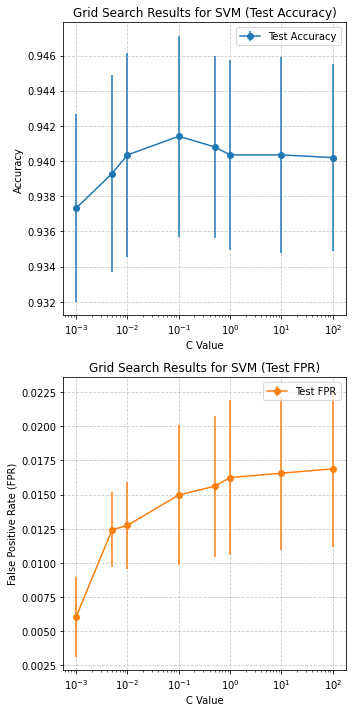

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the grid search results from the CSV file
C_tuning_gridSearch_df = pd.read_csv('C_tuning_gridSearch_results.csv')

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(5, 10))

# Plotting Test Accuracy
ax1 = axes[0]
ax1.errorbar(C_tuning_gridSearch_df['param_C'], C_tuning_gridSearch_df['mean_test_accuracy'], 
             yerr=C_tuning_gridSearch_df['std_test_accuracy'], fmt='o-', color='tab:blue', label='Test Accuracy')
ax1.set_xlabel('C Value')
ax1.set_ylabel('Accuracy')
ax1.set_title('Grid Search Results for SVM (Test Accuracy)')
ax1.set_xscale('log')  # Set x-axis to logarithmic scale for better visualization
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Plotting Test False Positive Rate (FPR)
ax2 = axes[1]
ax2.errorbar(C_tuning_gridSearch_df['param_C'], -C_tuning_gridSearch_df['mean_test_fpr'], 
             yerr=C_tuning_gridSearch_df['std_test_fpr'], fmt='o-', color='tab:orange', label='Test FPR')
ax2.set_xlabel('C Value')
ax2.set_ylabel('False Positive Rate (FPR)')
ax2.set_title('Grid Search Results for SVM (Test FPR)')
ax2.set_xscale('log')  # Set x-axis to logarithmic scale for better visualization
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [56]:
# use C = 0.1
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'mpDockQ/pDockQ', 'pi_score', 'model_1_multimer_v3_pred_0',
       'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
       'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']
X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn) 
print(fpr)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print(len(svm_classifier.support_vectors_))


0.9297820823244553
[[759  12]
 [104 777]]
0.01556420233463035
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       771
           1       0.98      0.88      0.93       881

    accuracy                           0.93      1652
   macro avg       0.93      0.93      0.93      1652
weighted avg       0.94      0.93      0.93      1652

941


In [55]:
# use C = 0.1
selected_columns = ['Polar', 'Hydrophobhic',
       'Charged', 'int_area', 'sc', 'hb', 'sb', 'int_solv_en',
       'mpDockQ/pDockQ', 'pi_score', 'model_1_multimer_v3_pred_0',
       'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
       'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']
X = df[selected_columns]
y = df.label.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn) 
print(fpr)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

print(len(svm_classifier.support_vectors_))

0.9309927360774818
[[759  12]
 [102 779]]
0.01556420233463035
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       771
           1       0.98      0.88      0.93       881

    accuracy                           0.93      1652
   macro avg       0.93      0.93      0.93      1652
weighted avg       0.94      0.93      0.93      1652

944


## TEST

In [13]:
# save model: model 7
from joblib import dump  
dump(svm_classifier, 'svm_model.joblib')

['svm_model.joblib']

In [14]:
# import model
from joblib import load  
svm_classifier = load('svm_model.joblib')

### 6 neurodevelopment cases

In [65]:
test_path = '/n/holyscratch01/ramanathan_lab/yuting/outputs/validation_1222/predictions_with_good_interpae.csv'
test_dir = '/n/holyscratch01/ramanathan_lab/yuting/outputs/validation_1222'
test_df = pd.read_csv(test_path)
test_df['file_source'] = f"{test_dir}" 

In [67]:
test_df['label'] = np.nan
n = len(test_df)
for i in range(n):
    pair = str(test_df['jobs'][i])
    pair = re.sub(r"_and_", ";", pair)
    test_df.loc[i, 'label'] = 1

In [68]:
new_column_names = {col: col.replace(' ', '') for col in test_df.columns}
test_df.rename(columns=new_column_names, inplace=True)
columns_to_convert = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en', 'int_area',
       'pi_score', 'pdb', 'pvalue', 'iptm_ptm', 'iptm', 'mpDockQ/pDockQ']
# Convert the specified columns to numeric
for column in columns_to_convert:
    test_df[column] = pd.to_numeric(test_df[column], errors='coerce')
    
# Add predictions
for i in range(n):
    if test_df.loc[i, 'pi_score'] <= 0:
        test_df.loc[i, 'pred'] = 0
    else: test_df.loc[i, 'pred'] = 1
    
# Remove rows with NaN values in selected columns  
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en', 'int_area',
       'pi_score', 'iptm_ptm', 'iptm', 'mpDockQ/pDockQ']
test_df = test_df.dropna(subset=selected_columns)
test_df = test_df.reset_index(drop=True)

## retrive all rank 1-4 data based on the df rowname and saved all into a new csv file
name_list = test_df.jobs.tolist()
file_paths = test_df.file_source.tolist()
print(len(name_list),len(file_paths))

In [71]:
import os
import json
def iptm_more(name_list, file_paths):
    res = dict()
    count = 0
    for f, name in zip(file_paths, name_list):
        file_path = os.path.join(f, name, "ranking_debug.json")
        with open(file_path, "r") as json_file:
            data = json.load(json_file)
            count+=1
        res[name] = data['iptm+ptm']
        print(count)
    return res

res = iptm_more(name_list, file_paths)

ans = list(res.keys())
for i in name_list:
    if i not in ans:
        print(i)

1
2
3
4
5
6


In [74]:
res_test_df = pd.DataFrame.from_dict(res, orient='index')
res_test_df.reset_index(inplace=True)
res_test_df = res_test_df.rename(columns={"index": "jobs"})
test_df = test_df.merge(res_test_df, on='jobs', how='left', indicator=False)
test_df

,jobs,pdb,interface,Num_intf_residues,Polar,Hydrophobhic,Charged,contact_pairs,sc,hb,...,iptm,mpDockQ/pDockQ,file_source,label,pred,model_1_multimer_v3_pred_0,model_2_multimer_v3_pred_0,model_3_multimer_v3_pred_0,model_4_multimer_v3_pred_0,model_5_multimer_v3_pred_0
0,HOPX_and_Hdac2,NaN,C_B,21.0,0.238,0.190,0.429,19.0,0.409,8.0,...,0.581448,0.215746,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.457607,0.296250,0.452281,0.515247,0.610698
1,Nanog_and_Dax1,NaN,C_B,123.0,0.341,0.415,0.138,185.0,0.185,30.0,...,0.488710,0.167606,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.467405,0.470766,0.461908,0.469663,0.468841
2,Oct4_and_Sox2,NaN,C_B,21.0,0.381,0.286,0.238,20.0,0.311,5.0,...,0.251397,0.047096,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.193240,0.169670,0.164415,0.265663,0.163266
3,HOPX_and_Smad4,NaN,C_B,33.0,0.333,0.152,0.303,41.0,0.237,8.0,...,0.237290,0.099213,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.215960,0.277794,0.211501,0.236326,0.209375
4,Nanog_and_Oct4,NaN,C_B,66.0,0.258,0.227,0.273,90.0,0.187,12.0,...,0.182871,0.032469,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.209458,0.205119,0.186684,0.172217,0.151656
5,Nanog_and_Zfp281,NaN,C_B,84.0,0.357,0.310,0.179,109.0,0.189,20.0,...,0.173493,0.028440,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.172292,0.181346,0.172157,0.172906,0.160979


In [75]:
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'mpDockQ/pDockQ', 'pi_score', 'model_1_multimer_v3_pred_0',
       'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
       'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']
X = test_df[selected_columns]
y_test = test_df.label.astype(int)

scaler = StandardScaler()
X_test = scaler.fit_transform(X)

y_pred = svm_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp/(fp+tn) 
print(fpr)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

0.5
[[0 0]
 [3 3]]
nan
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         6

    accuracy                           0.50         6
   macro avg       0.50      0.25      0.33         6
weighted avg       1.00      0.50      0.67         6



/tmp/ipykernel_122448/559684485.py:16: RuntimeWarning: invalid value encountered in scalar divide
  fpr = fp/(fp+tn)
/n/home10/ytingliu/.conda/envs/alphapulldown_new/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/n/home10/ytingliu/.conda/envs/alphapulldown_new/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/n/home10/ytingliu/.conda/envs/alphapulldown_new/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in 

In [77]:
test_df['pred'] = y_pred

In [75]:
test_df['pi_score']

0   -0.77
1    0.83
2   -1.94
3   -1.88
4   -0.36
5    0.45
Name: pi_score, dtype: float64

### Benchmark testing

In [17]:
test_df = pd.read_csv('anjali_0313.csv')
test_df

,jobs,interface,Num_intf_residues,Polar,Hydrophobhic,Charged,contact_pairs,sc,hb,sb,...,pi_score,iptm_ptm,iptm,mpDockQ/pDockQ,file_source,model_1_multimer_v3_pred_0,model_2_multimer_v3_pred_0,model_3_multimer_v3_pred_0,model_4_multimer_v3_pred_0,model_5_multimer_v3_pred_0
0,P32324_and_Q12429,C_B,30,0.267,0.267,0.233,30,0.526,12,5,...,0.23,0.805961,0.833609,0.393542,/n/holyscratch01/ramanathan_lab/yuting/outputs...,0.801000,0.785790,0.738572,0.805961,0.778927
1,P32324_and_P32469,C_B,24,0.250,0.458,0.167,20,0.466,3,2,...,-0.78,0.793497,0.831621,0.318616,/n/holyscratch01/ramanathan_lab/yuting/outputs...,0.691541,0.731838,0.704701,0.793497,0.745373
2,P32324_and_P38332,C_B,19,0.211,0.211,0.105,15,0.519,5,5,...,1.08,0.755264,0.780193,0.377664,/n/holyscratch01/ramanathan_lab/yuting/outputs...,0.718276,0.635066,0.660212,0.755264,0.730978
3,P32324_and_P32461,C_B,62,0.226,0.339,0.242,55,0.621,16,3,...,1.69,0.772809,0.769397,0.438986,/n/holyscratch01/ramanathan_lab/yuting/outputs...,0.772809,0.759228,0.725714,0.736319,0.716159
4,P32324_and_P42842,C_B,78,0.205,0.410,0.205,72,0.467,15,15,...,1.02,0.756491,0.753928,0.589403,/n/holyscratch01/ramanathan_lab/yuting/outputs...,0.753221,0.676285,0.654374,0.677285,0.756491
5,P32324_and_P33313,C_B,28,0.179,0.500,0.250,21,0.546,6,7,...,1.58,0.591036,0.584754,0.277098,/n/holyscratch01/ramanathan_lab/yuting/outputs...,0.591036,0.575717,0.562210,0.576532,0.508703
6,P32324_and_Q12347,C_B,36,0.278,0.278,0.194,34,0.368,13,11,...,-0.94,0.542495,0.530323,0.305739,/n/holyscratch01/ramanathan_lab/yuting/outputs...,0.542495,0.385421,0.353645,0.403737,0.477247
7,P32324_and_P48362,C_B,96,0.292,0.406,0.229,244,0.006,31,5,...,0.93,0.259352,0.193356,0.698591,/n/holyscratch01/ramanathan_lab/yuting/outputs...,0.229720,0.225692,0.221415,0.259352,0.239402
8,P32324_and_P41821,C_B,72,0.222,0.375,0.278,126,0.109,21,9,...,0.76,0.257903,0.192278,0.368189,/n/holyscratch01/ramanathan_lab/yuting/outputs...,0.257903,0.239165,0.232055,0.246135,0.231306
9,P32324_and_P39076,C_B,11,0.364,0.455,0.091,18,0.069,0,0,...,-0.96,0.241940,0.175419,0.051883,/n/holyscratch01/ramanathan_lab/yuting/outputs...,0.241940,0.231868,0.222333,0.236984,0.225083


In [20]:
selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
       'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
       'int_area', 'mpDockQ/pDockQ', 'pi_score', 'model_1_multimer_v3_pred_0',
       'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
       'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']
X = test_df[selected_columns]

scaler = StandardScaler()
X_test = scaler.fit_transform(X)

y_pred = svm_classifier.predict(X_test)
test_df['y_pred'] = y_pred
test_df

### Application cases